In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import firwin
from shoebox.firwin_torch import firwin_torch
from shoebox.firwin_scipy import firwin_scipy


In [4]:
def rir_bands(rir, f_center=None, fs=16000, device='cpu'):
    if not f_center:
        nBands = 6
        f_center = torch.zeros(nBands).to(device=device)
        f_center[0] = 125.0     # lowest octave band
        for it in range(1, nBands):
            f_center[it] =  2.0 * f_center[it-1]
    else:
        nBands = f_center.size(0)

    if nBands == 1:
        return rir
    else:
        # order of filters
        order = 1000
        filters = torch.zeros(order + 1, nBands).to(device=device)

        for i in range(nBands):
            if i == 0:
                fl = 30
                fh = (f_center[i] * f_center[i + 1]).sqrt()
                w = torch.tensor([fl / (fs / 2), fh / (fs / 2)]).to(device=device)
                filters[:, i] = firwin_torch(order + 1, w, pass_zero='bandpass', fs=fs, idx = i, device=device)
            elif i == nBands - 1:
                fl = (f_center[i] * f_center[i - 1]).sqrt()
                w = torch.tensor([fl / (fs / 2)]).to(device=device)
                filters[:, i] = firwin_torch(order + 1, w, pass_zero='highpass', fs=fs, idx = i, device=device)
            else:
                fl = (f_center[i] * f_center[i - 1]).sqrt()
                fh = (f_center[i] * f_center[i + 1]).sqrt()
                w = torch.tensor([fl / (fs / 2), fh / (fs / 2)]).to(device=device)
                filters[:, i] = firwin_torch(order + 1, w, pass_zero='bandpass', fs=fs, idx = i, device=device)
        # padding
        # temp_rir = torch.cat([rir, torch.zeros(order).to(device=device)])

        #plot filters
        plt.figure(4, figsize=(15,4))
        for it in range(filters.size(1)):
            plt.subplot(2,3,it+1)
            plt.plot(filters[:,it])

        # rir_filt = torch.zeros(rir.size(0)).to(device=device)
        # for j in range(nBands):
        #     xy = torch.nn.functional.conv1d(temp_rir.reshape(1, -1), filters[:, j].reshape(1,1,-1), stride=1, padding='valid', bias=None).squeeze()
        #     rir_filt = torch.vstack((rir_filt, xy))

        # rir_filt = rir_filt[1:,:].T
            
        return None

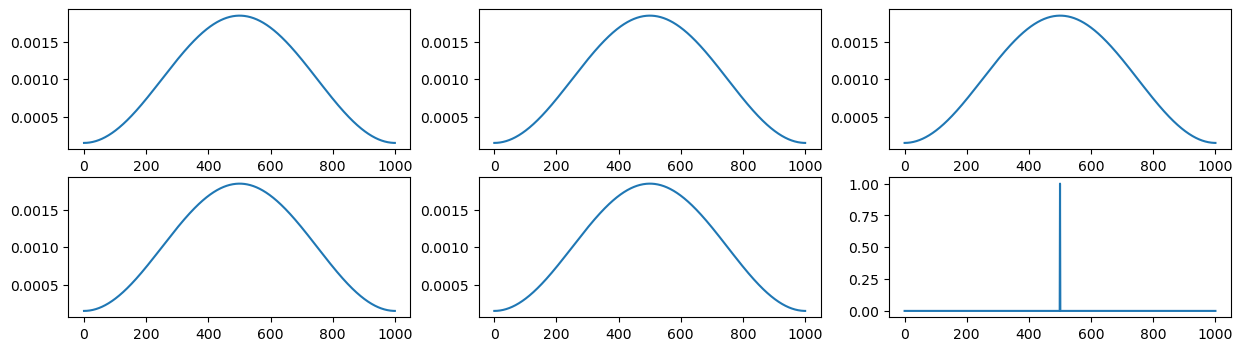

In [5]:
rir_bands(torch.tensor([1,2,3,4]))

In [23]:
def rir_bands2(rir, f_center=None, fs=48000, device='cpu'):
    if not f_center:
        nBands = 6
        f_center = np.zeros(nBands)#.to(device=device)
        f_center[0] = 125.0     # lowest octave band
        for it in range(1, nBands):
            f_center[it] =  2.0 * f_center[it-1]
    else:
        nBands = f_center.size(0)

    if nBands == 1:
        return rir
    else:
        # order of filters
        order = 1000
        filters = np.zeros((order + 1, nBands))#.to(device=device)

        for i in range(nBands):
            if i == 0:
                fl = 30
                fh = np.sqrt(f_center[i] * f_center[i + 1])
                w = [fl / (fs / 2), fh / (fs / 2)]
                # w = torch.tensor().to(device=device)
                filters[:, i] = firwin(order + 1, w, pass_zero='bandpass', fs=fs)
            elif i == nBands - 1:
                fl = np.sqrt(f_center[i] * f_center[i - 1])
                w = [fl / (fs / 2)]
                # w = torch.tensor().to(device=device)
                filters[:, i] = firwin(order + 1, w, pass_zero='highpass', fs=fs)
            else:
                fl = np.sqrt(f_center[i] * f_center[i - 1])
                fh = np.sqrt(f_center[i] * f_center[i + 1])
                w = [fl / (fs / 2), fh / (fs / 2)]
                # w = torch.tensor().to(device=device)
                filters[:, i] = firwin(order + 1, w, pass_zero='bandpass', fs=fs)
            print(f'i={i}, w={w}')
        # padding
        # temp_rir = torch.cat([rir, torch.zeros(order).to(device=device)])
        print(filters.shape)
        #plot filters
        plt.figure(4, figsize=(15,4))
        for it in range(filters.shape[1]):
            plt.subplot(2,3,it+1)
            plt.plot(filters[:,it])

i=0, w=[0.00125, 0.00736569563735987]
i=1, w=[0.00736569563735987, 0.01473139127471974]
i=2, w=[0.01473139127471974, 0.02946278254943948]
i=3, w=[0.02946278254943948, 0.05892556509887896]
i=4, w=[0.05892556509887896, 0.11785113019775792]
i=5, w=[0.11785113019775792]
(1001, 6)


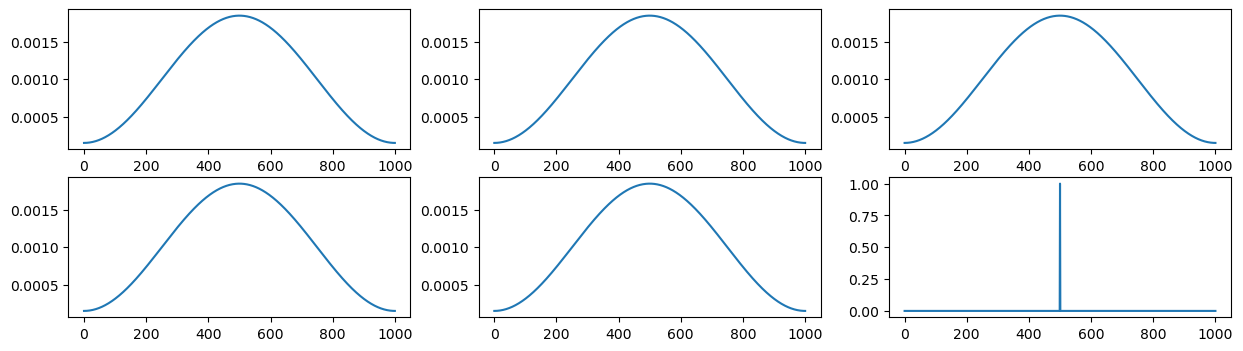

In [24]:
rir_bands2(([1,2,3,4]))